# First we read the data with pandas library and take a quick look at it

In [1]:
import pandas as pd
df = pd.read_csv("./transfusion.data")
df

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


### Import matplotlib for scatter and box plots

In [2]:

from matplotlib import pyplot as plt


# Before that we define some constants for our features

In [3]:
RECENCY = "Recency (months)"
FREQUENCY = "Frequency (times)"
MONETARY = "Monetary (c.c. blood)"
TIME = "Time (months)"
LABEL = "whether he/she donated blood in March 2007"

# Here we create a 4×4 plot corresponding with each two features and plot the scatters

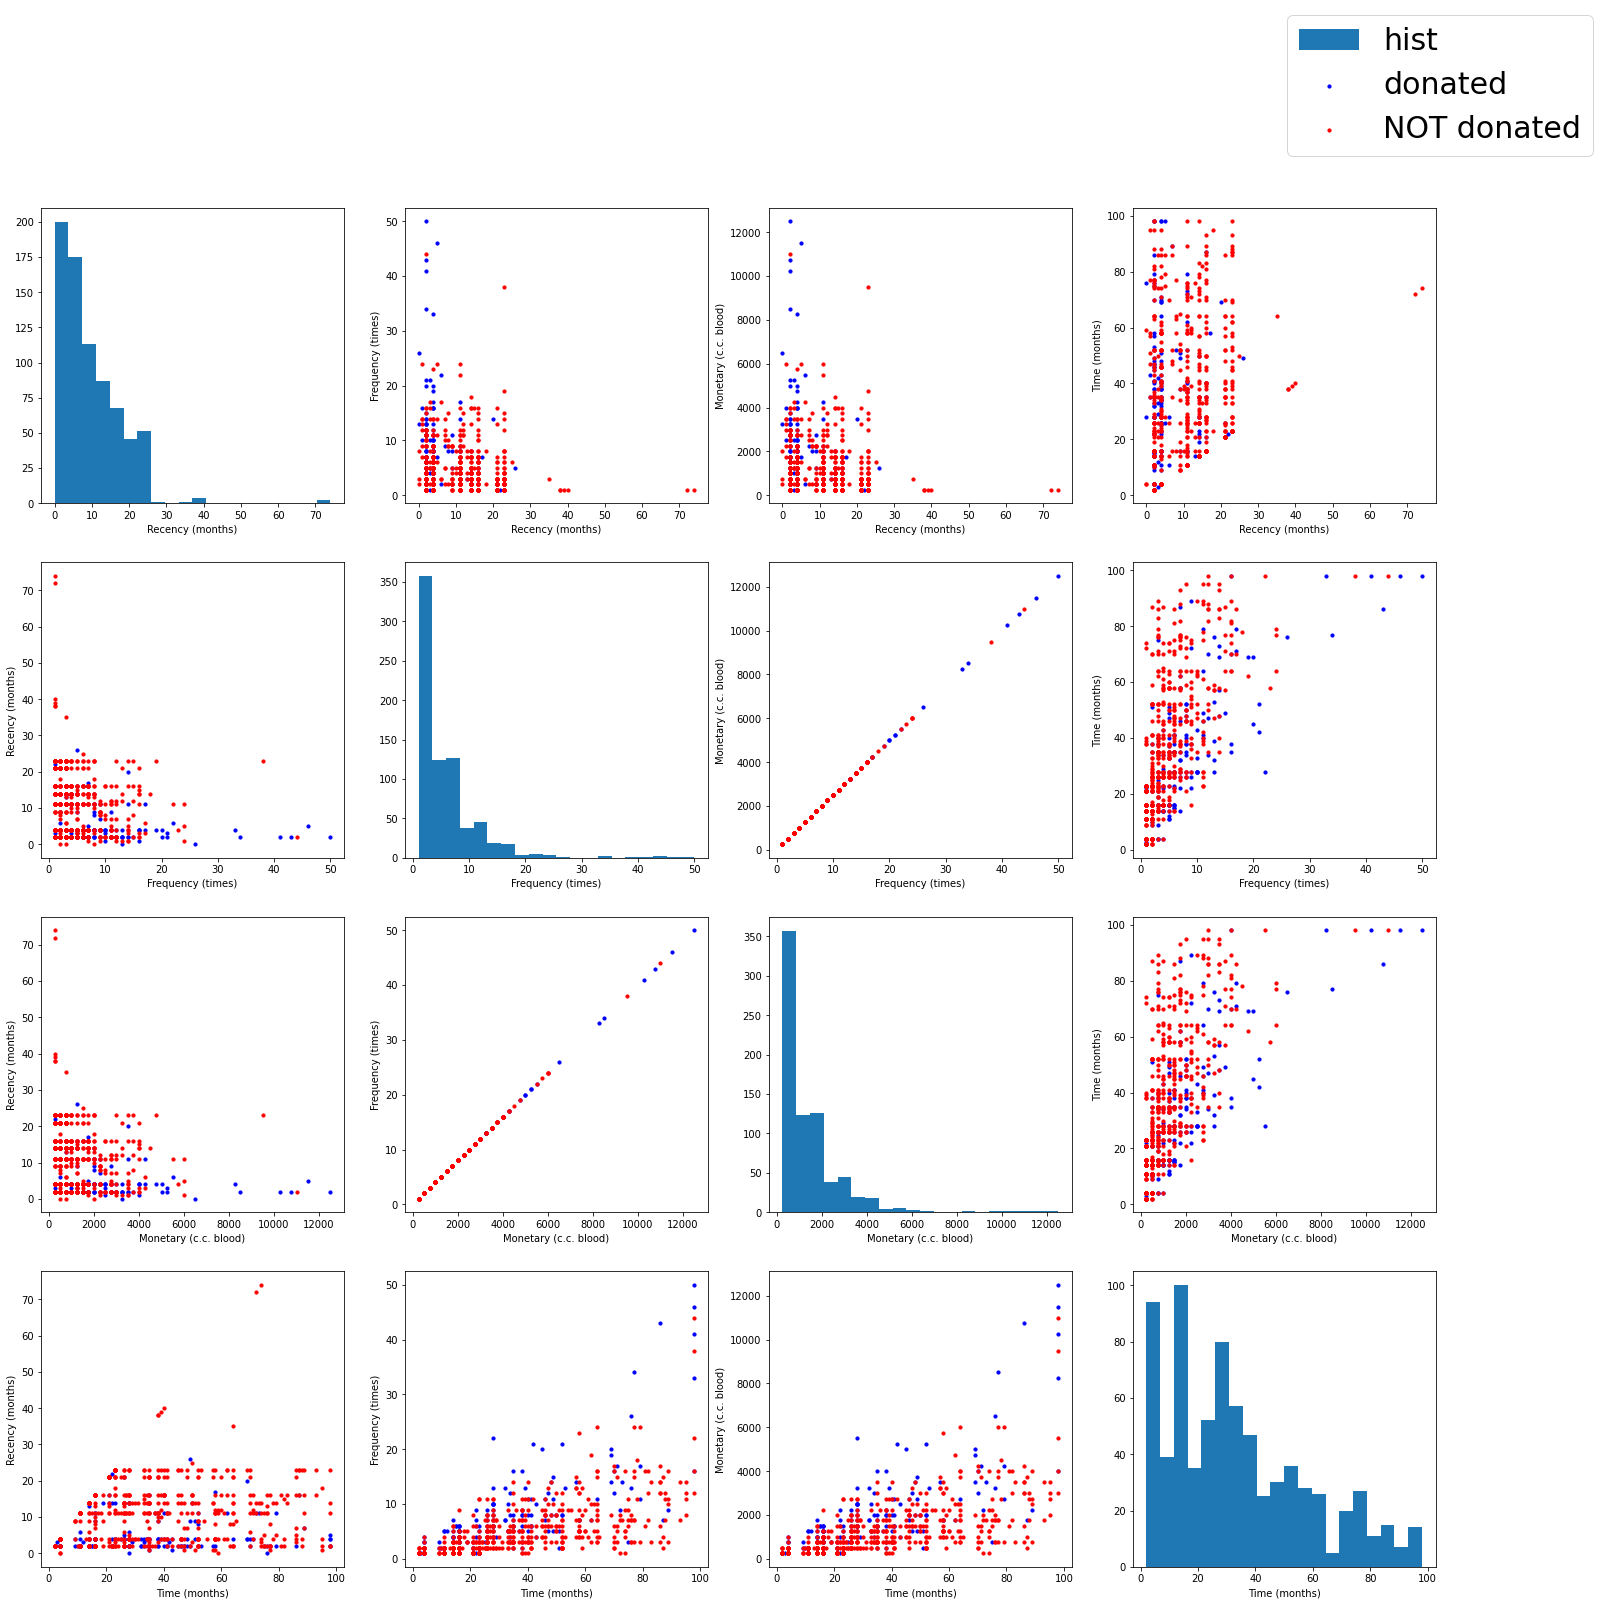

In [4]:
features = [RECENCY, FREQUENCY, MONETARY, TIME]
figure, axis = plt.subplots(len(features), len(features), figsize = (25, 25))
for i in range(len(features)):
    for j in range(len(features)):
        if i != j:
            axis[i, j].scatter(x=df[features[i]][df[LABEL] == 1], y=df[features[j]][df[LABEL] == 1], s=10, c="blue")
            axis[i, j].scatter(x=df[features[i]][df[LABEL] == 0], y=df[features[j]][df[LABEL] == 0], s=10, c="red")
            axis[i, j].set_ylabel(features[j])
        else:
            axis[i, j].hist(df[features[i]], bins=20)
        axis[i, j].set_xlabel(features[i])

figure.legend(["hist", "donated", "NOT donated"], fontsize=30)
# figure.savefig('scatter-plot.png', facecolor="white", edgecolor='none')

##### As you can see the features "Frequency" and "Monetry" are related linearly! 
##### so any relation that one side is "Frequency" and other side is "Monetry" are alike in their plots! 
##### for example [Frequency & Time] and [Monetry & Time]
##### or [Recency & Frequency] and [Recency & Monetry]



### for conclusion we can say that the scatter plots shows that the features aren't seperated well, but a less worse features would be [Time & Frequency]

# Then we create the box plots

### Before we plot the boxplot we remove the Monetary which is useless as we saw earlier

In [5]:
df.drop(columns=[MONETARY], inplace=True)
features.remove(MONETARY)
df

,Recency (months),Frequency (times),Time (months),whether he/she donated blood in March 2007
0,2,50,98,1
1,0,13,28,1
2,1,16,35,1
3,2,20,45,1
4,1,24,77,0
...,...,...,...,...
743,23,2,38,0
744,21,2,52,0
745,23,3,62,0
746,39,1,39,0


### Here we plot the boxplot for each category individually:

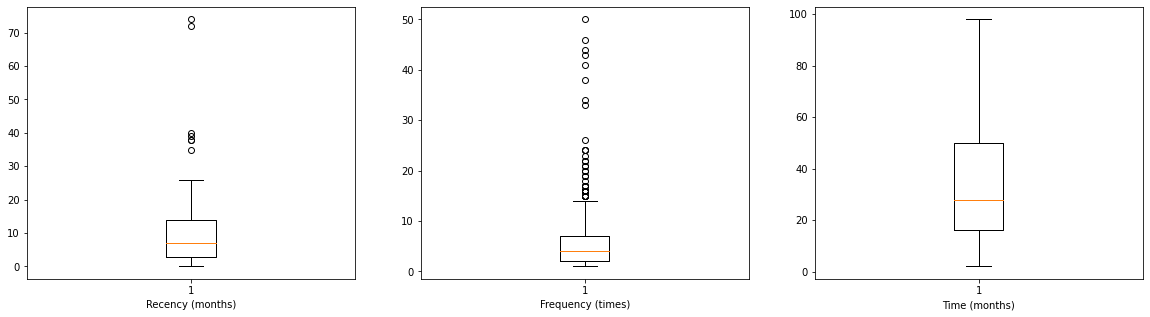

In [6]:
figure, axis = plt.subplots(1, len(features), figsize=(20, 5))
for i in range(len(features)):
    axis[i].boxplot(df[features[i]])
    axis[i].set_xlabel(features[i])
# figure.savefig('box-plot.png', facecolor="white")

([<matplotlib.axis.XTick at 0x7f3a66a98e50>,
 [Text(1, 0, 'Recency (months)'),
  Text(2, 0, 'Frequency (times)'),
  Text(3, 0, 'Time (months)')])

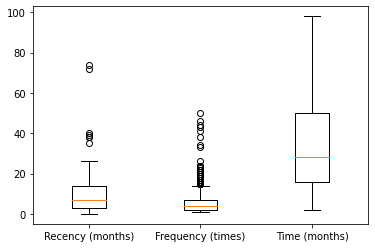

In [7]:
plt.boxplot(df[features])
plt.xticks([1, 2, 3], features)

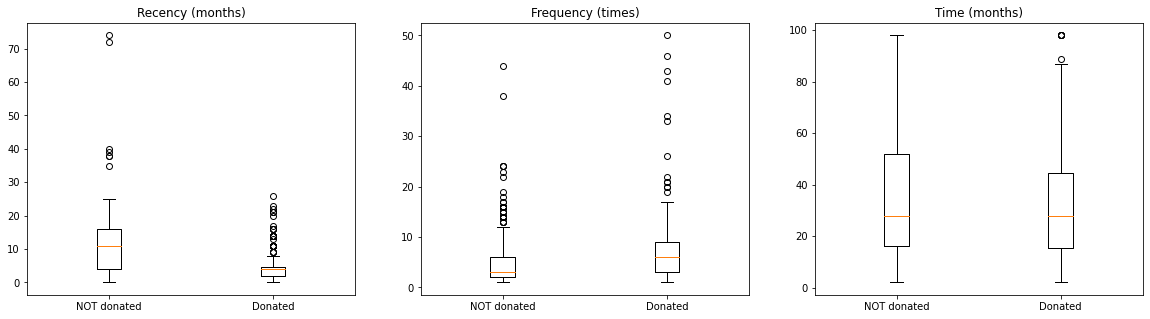

In [8]:
figure, axis = plt.subplots(1, len(features), figsize=(20, 5))
for i in range(len(features)):
    axis[i].boxplot((df[features[i]][df[LABEL] == 0], df[features[i]][df[LABEL] == 1]))
    axis[i].set_xticklabels(["NOT donated", "Donated"])
    axis[i].set_title(features[i])
# figure.savefig('box-plot-individually.png', facecolor="white")

### And here the feature "Recency" seems to have the lowest overlap between the "NOT donated" and "Donated" categories. so it seems to be the best feature to use in our model. now lets look more precise:

##### Here we just calcuate the overlap and devide it by its range to get the ratio. see the results:

In [9]:
for feature in features:
    data = df[feature]
    feature_overlap = data[df[LABEL] == 1].quantile(0.75) - data[df[LABEL] == 0].quantile(0.25) 
    feature_overlap_rate = feature_overlap / (data.quantile(0.75) - data.quantile(0.25))
    print(f"\"{feature}\" overlap rate: {feature_overlap_rate}")

"Recency (months)" overlap rate: 0.06666666666666667
"Frequency (times)" overlap rate: 1.4
"Time (months)" overlap rate: 0.8382352941176471


# The numbers also show that the Recency's overlap rate is the lowest so it's the best feature